# Capstone 2: A Study Into Online Food Delivery Services by Guransh Sodhi

The overarching goal of this project is to develop an informative, all encompassing analysis
based upon data procured from industry-leading pioneers that display the traversal of food ordering applications
through history since its inception and identify how the space hasmatured into the thriving market worth
billions that it is today.

The methodology of this project is to build optimum predictive models for predicting User Ratings for when they
order food from restaurants online, build AI models for classification of positive vs negative customer
reviews, and use various findings in aiding business for both the online food app marketplace as well as
the restaurants that are on these platforms.

## Importing the libraries

In [84]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [85]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Preprocessing, Cleaning and Engineering the data

In [86]:
df.shape

(51717, 17)

In [87]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [89]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [90]:
# dropping the unnecessary columns
df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [91]:
# checking duplicate values
df.duplicated().sum()

43

In [92]:
# dropping the duplicates values from the dataset
df.drop_duplicates(inplace=True)

In [93]:
# missing values
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [94]:
# dropping the null values from the dataset
df.dropna(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [96]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [97]:
# renaming the columns
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [98]:
df.dtypes

# We notice that "cost" is an object

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [99]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [100]:
#Some transformations for better modelling

df['cost']=df['cost'].astype(str)

#Using lambda function to replace ',' from cost
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))

df['cost'] = df['cost'].astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [102]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [103]:
# handling 'NEW', '-' and '/5' in "rate" for uniformity

def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [104]:
df.dropna(inplace=True)

In [105]:
# Adjusting the binary obs names
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [106]:
#Encoding the Input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())
df_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

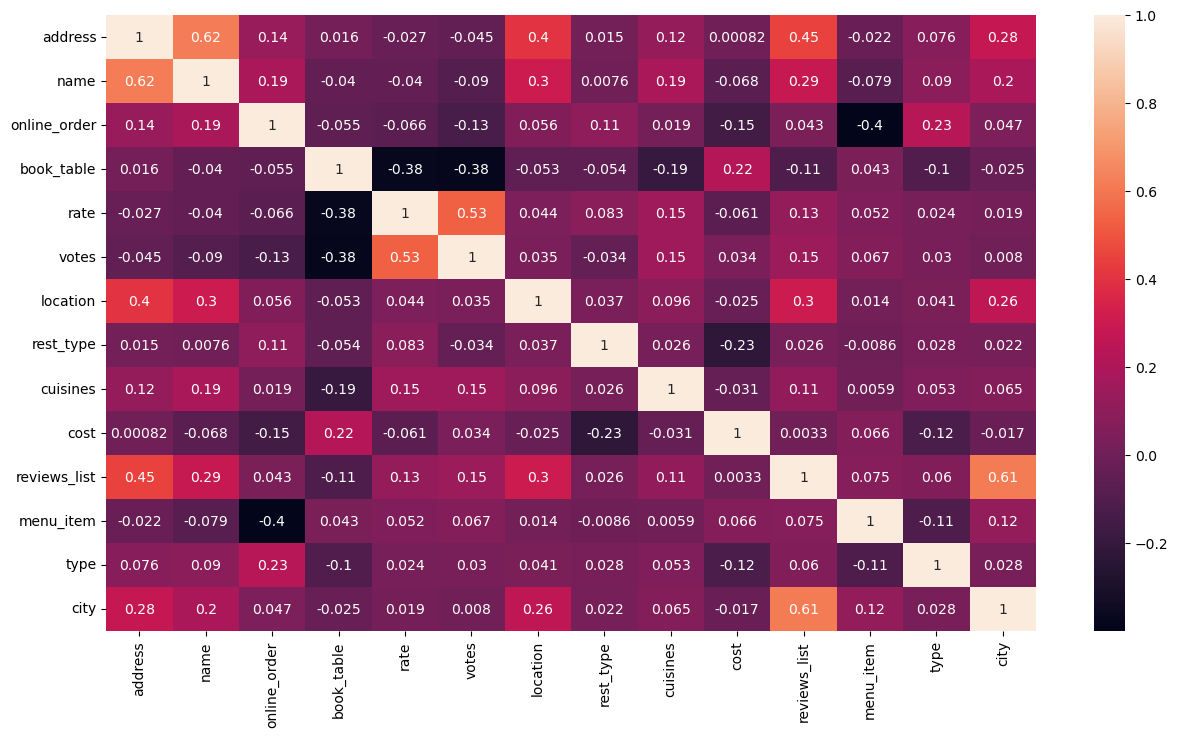

In [107]:
# Correlation Matrix between different variables
corr = df_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_en.columns

# Exploratory Data Analysis (EDA)

**Lets check what the split is between restaurants that accept online ordering**

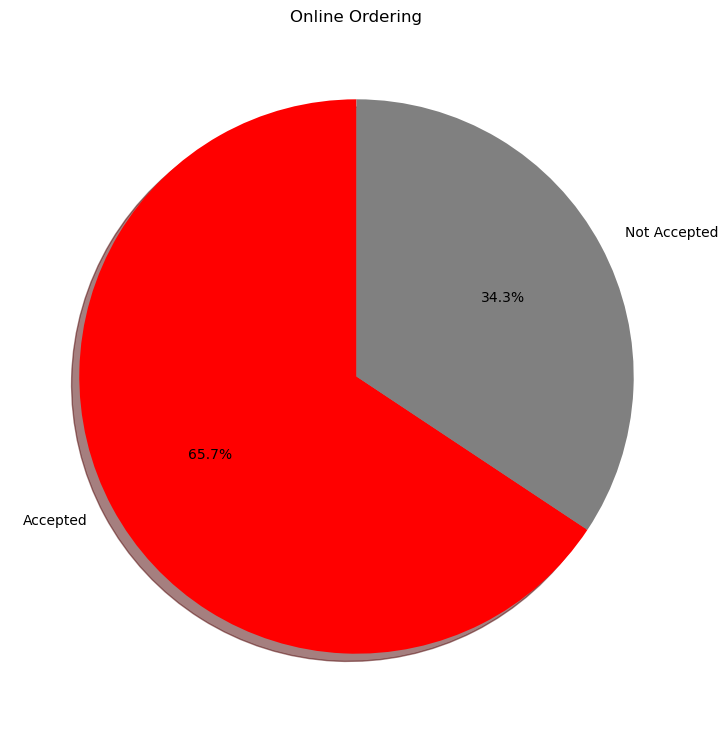

In [108]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'grey']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Online Ordering')
plt.show()

We can see that a majority of the restaurants allow online food ordering.
The reason this no. isnt higher may be due to the remoteness or infrastructure of the restaurants.
Another reason could be that those restaurants cannot/dont wish to afford paying the platform fees.

**Now lets check how many restaurants allow the reservation of tables**

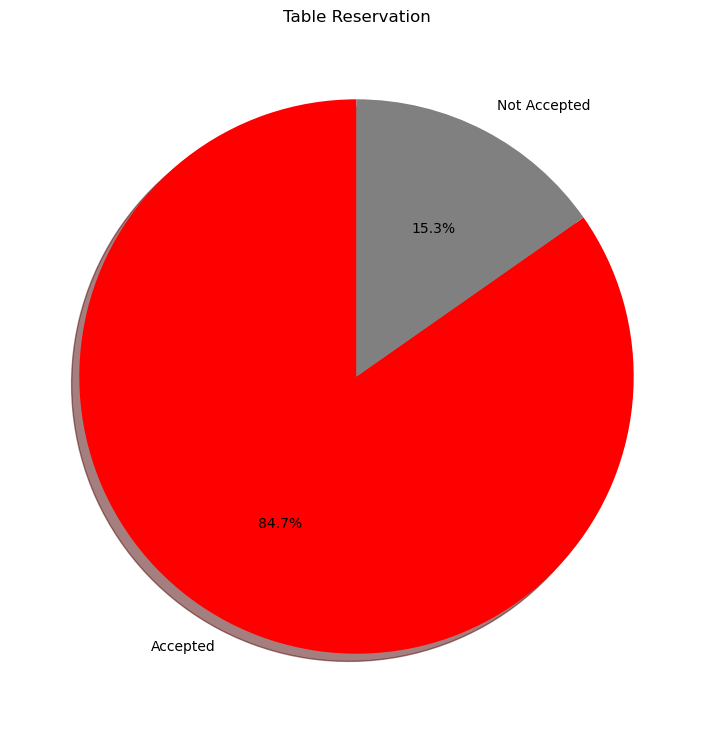

In [109]:
labels = ["Accepted",'Not Accepted']
values = df['book_table'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'grey']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.title('Table Reservation')
plt.show()

This no. is very high. We can deduce that almost all dine-in restaurants have this functionality, 
and perhaps the other 14.8 percent are either backward in terms of their online presence or dont 
provide the option of dining, only delivery.

**Now lets find the relationship between restaurants that accept online ordering and ratings:**

<Axes: xlabel='online_order', ylabel='rate'>

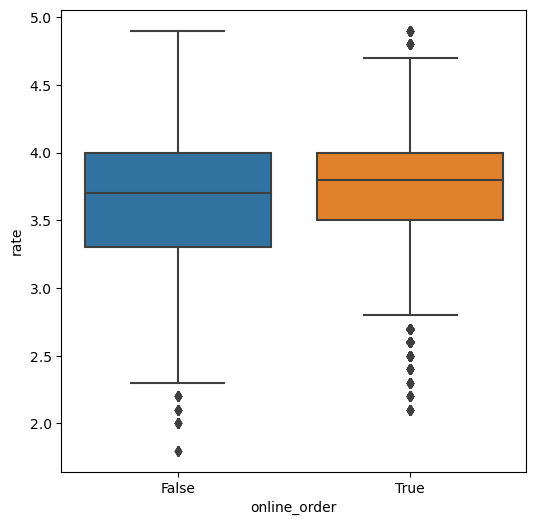

In [110]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

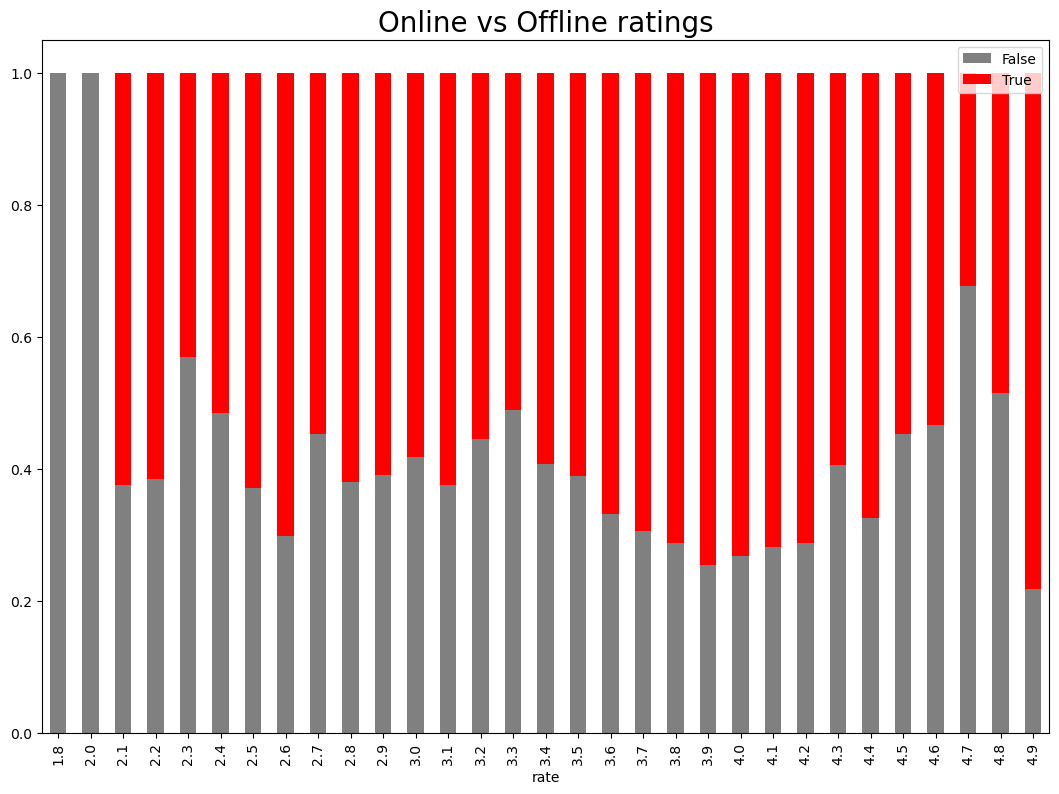

In [111]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['online_order'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','red'])
plt.title('Online vs Offline ratings', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

We can clearly deduct that there is a positive correlation between online functionality and ratings.
Restaurants should pay close attention to these numbers and companies should use this data to pitch 
to new restaurants for gaining business.

**Similarly, lets find the relationship between restaurants that accept online reservations and ratings:**

<Axes: xlabel='book_table', ylabel='rate'>

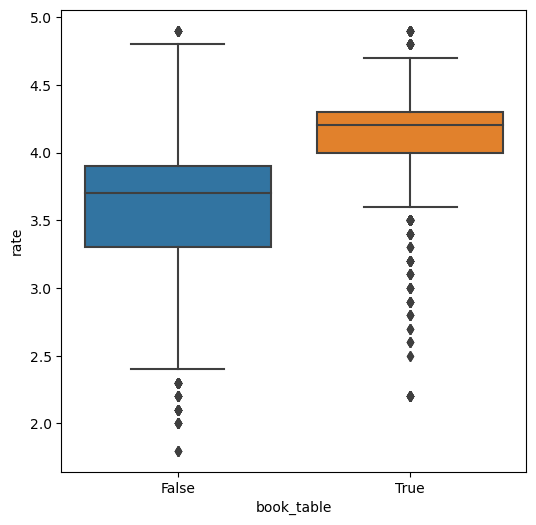

In [112]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

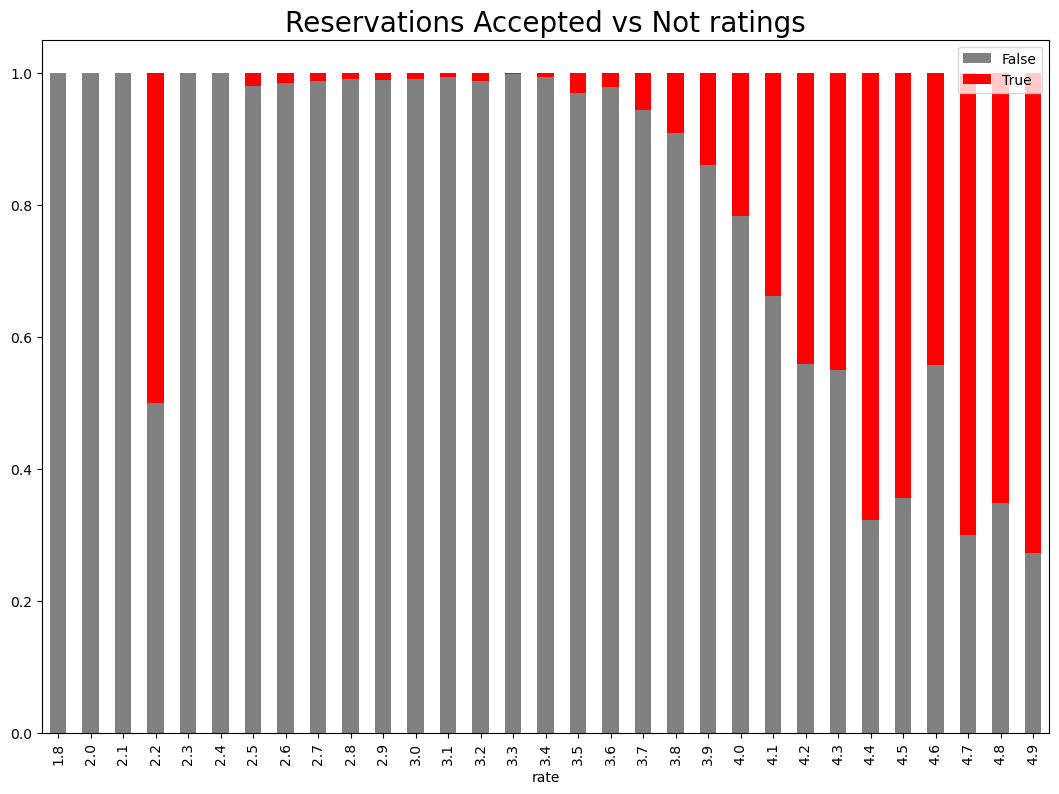

In [113]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','red'])
plt.title('Reservations Accepted vs Not ratings', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Once again, we see a positive correlation. This time it is even stronger and we can satisfactorily
say restaurants that offer online table reservation optionality are rated higher.

**Lets visualise the categories of restaurants in the database:**

Text(0.5, 0, 'count')

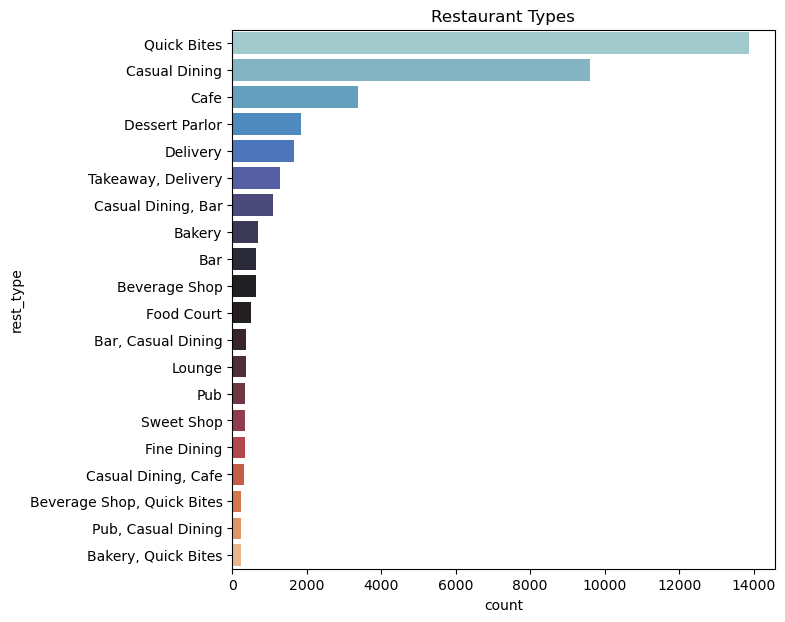

In [114]:
plt.figure(figsize=(7,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(x=rest,y=rest.index, palette="icefire")
plt.title("Restaurant Types")
plt.xlabel("count")

Since the data is from a metropolitan city, we can see that the fast-paced lifestyle leads to
"quick bites" being the most popular

**Now lets check for the relationship between type of restaurant and ratings:**

<Axes: xlabel='type', ylabel='rate'>

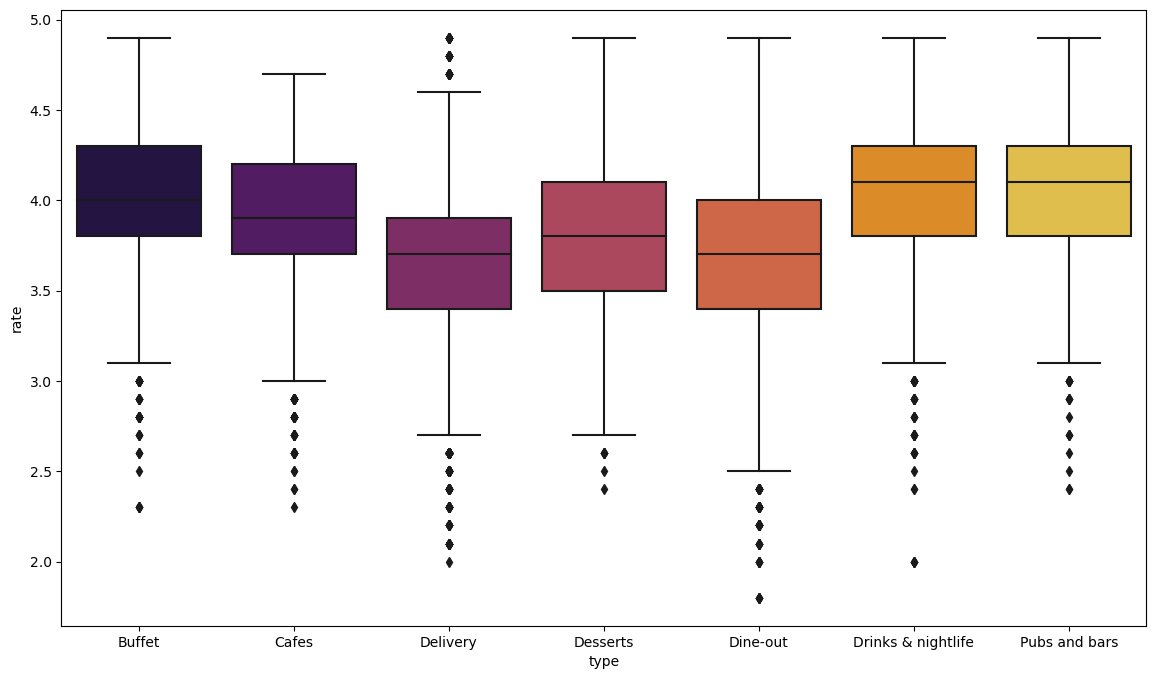

In [115]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')

**Lets take a wholistic view on the no. of restaurants per type as well as the number of restaurants per
rating threshold**

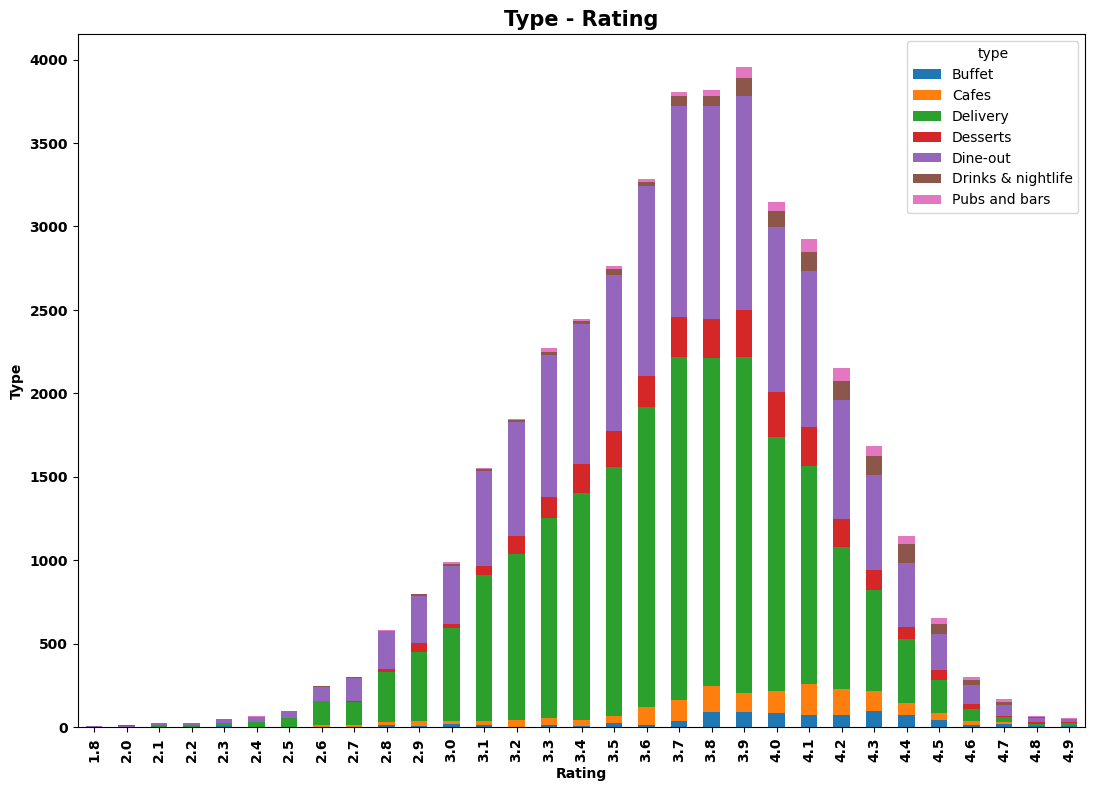

In [116]:
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

**Exploring some other miscellaneous features:**

Text(0.5, 1.0, 'Popular Cuisines')

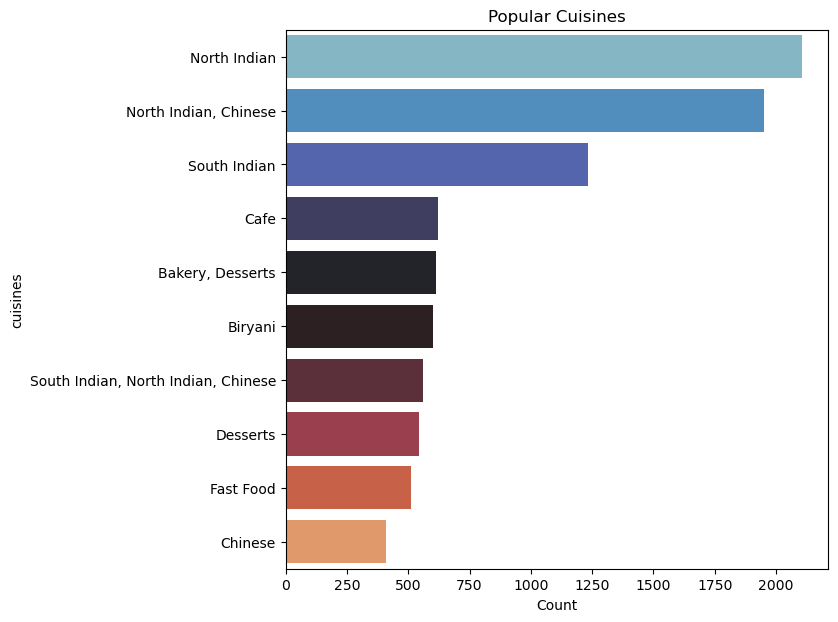

In [117]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index, palette="icefire")
plt.xlabel('Count')
plt.title("Popular Cuisines")

<Axes: xlabel='online_order', ylabel='votes'>

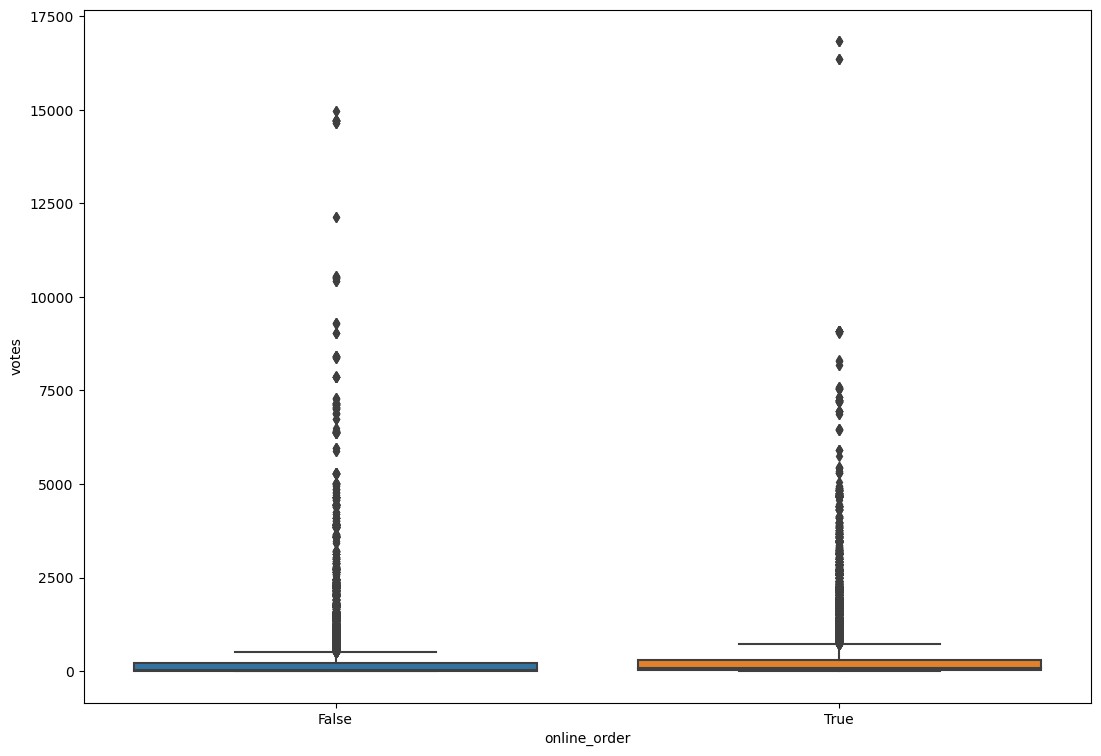

In [118]:
sns.boxplot(x='online_order',y='votes',data=df)

From this we can deduce that restaurants than have online ordering functionality receive
a greater magnitude of votes

# Model Building using ML algorithms

In [120]:
x = df_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = df_en['rate']

# Getting the training and test datasets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
21375,0,1,0,8,2,5,250.0,0
910,0,1,131,8,4,278,400.0,190
8438,0,1,137,45,2,1295,250.0,0
11871,0,1,74,16,0,537,1.0,0
31789,0,1,61,12,2,1860,350.0,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41237 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       41237 non-null  object 
 1   name          41237 non-null  object 
 2   online_order  41237 non-null  bool   
 3   book_table    41237 non-null  bool   
 4   rate          41237 non-null  float64
 5   votes         41237 non-null  int64  
 6   location      41237 non-null  object 
 7   rest_type     41237 non-null  object 
 8   cuisines      41237 non-null  object 
 9   cost          41237 non-null  float64
 10  reviews_list  41237 non-null  object 
 11  menu_item     41237 non-null  object 
 12  type          41237 non-null  object 
 13  city          41237 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 4.2+ MB


In [122]:
# Preparing a Linear Regression Model

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.27362337221039545

In [123]:
# Preparing a Decision Tree Model

from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8341765233996932

In [124]:
# Preparing Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=324,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.8730635554188295

**Since this is the best model so far, lets visualise its performance**

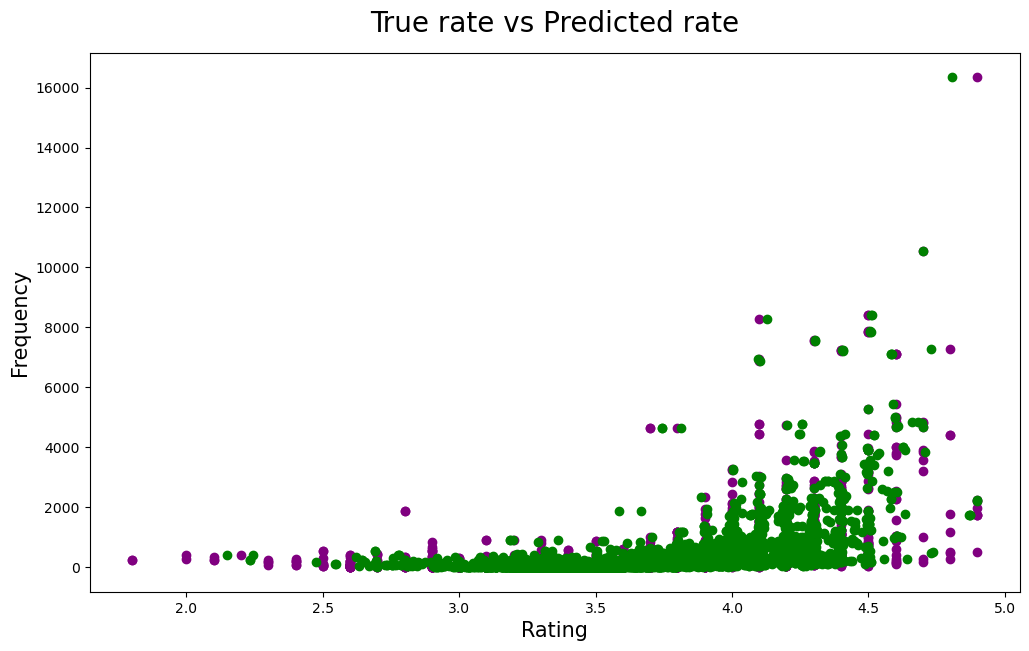

In [141]:
plt.figure(figsize=(12,7))
preds_rf = RForest.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="purple")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="green")

In [125]:
# Preparing Extra Tree Regression

from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

0.9365859439694865

**Since this is the updated best model so far, lets visualise its performance**

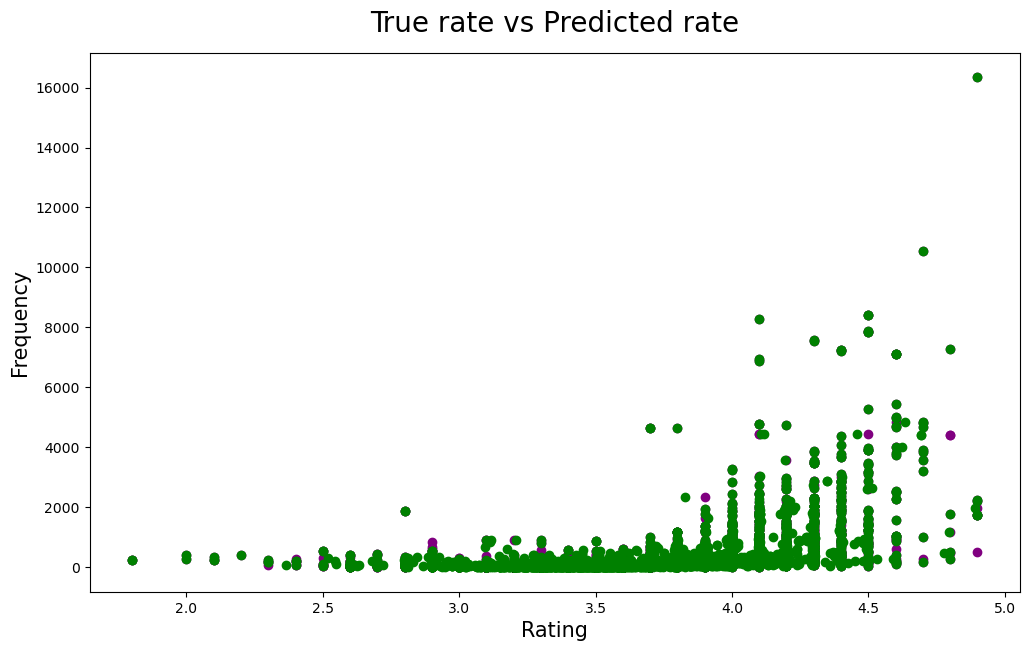

In [142]:
plt.figure(figsize=(12,7))
preds_rf = ETree.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="purple")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="green")

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_predict=gbr.predict(x_test)



r2_score(y_test,y_predict)

0.5121788874345972

In [127]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.7741671631540267

In [128]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test), ETree.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Extra Tree Regressor,0.936586
2,Random Forest,0.873064
1,Decision Tree,0.834177
5,XgBoost,0.774167
4,Gradient Boost,0.512179
0,Linear Regression,0.273623


## Selecting the ideal model

**As we have learnt, the ExtraTrees model seems to work best on our dataset. Let us dive deeper into this:**

In [150]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [152]:
# Make predictions on the test data
y_pred_ext = ETree.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_ext)
mse = mean_squared_error(y_test, y_pred_ext)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ext)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2)) 

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R-squared (R2) Score: 0.94


In [155]:
# New DataFrame Comparing the actual rating vs predicted rating

ext_df = pd.DataFrame()

ext_df['Actual_Rating'] = y_test
ext_df['Pred_Rating'] = y_pred
ext_df['Delta'] = ext_df['Actual_Rating'] - ext_df['Pred_Rating']

ext_df.head(15)

,Actual_Rating,Pred_Rating,Delta
14329,3.5,3.519268,-0.019268
14305,4.0,3.680835,0.319165
46979,4.1,3.597927,0.502073
32716,4.0,3.648594,0.351406
39220,3.4,3.492265,-0.092265
15766,4.0,4.058010,-0.058010
45530,3.6,3.610956,-0.010956
31283,4.1,4.086234,0.013766
29807,3.1,3.640293,-0.540293
10433,3.9,3.684211,0.215789


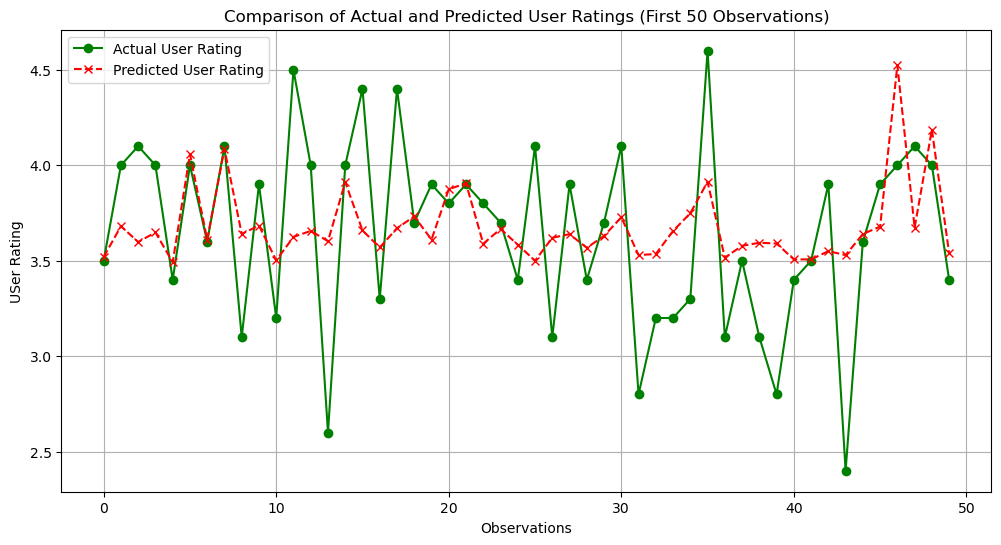

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.head(50).values, label='Actual User Rating', marker='o', linestyle='-', color='g')
plt.plot(y_pred[:50], label='Predicted User Rating', marker='x', linestyle='--', color='r')
plt.title('Comparison of Actual and Predicted User Ratings (First 50 Observations)')
plt.xlabel('Observations')
plt.ylabel('USer Rating')
plt.legend()
plt.grid(True)
plt.show()

**Hence can conclude that the model built using the ExtraTrees algorithm, which is a bagging/bootstrap aggregation
ensemble technique, performs the best on our data with respect to the target variable**

# Model Building using DL algorithms (Sentimental Analysis)

## Firstly some preprocessing:

In [129]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm import tqdm
import re
from tensorflow.keras.preprocessing.text import Tokenizer

In [130]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

41237it [00:08, 4685.18it/s]


In [131]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [132]:
rating_df.to_csv("Ratings.csv")

In [133]:
rating_df.head()

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...


Let us visualise what is the count of each rating threshold:

Text(0, 0.5, 'count')

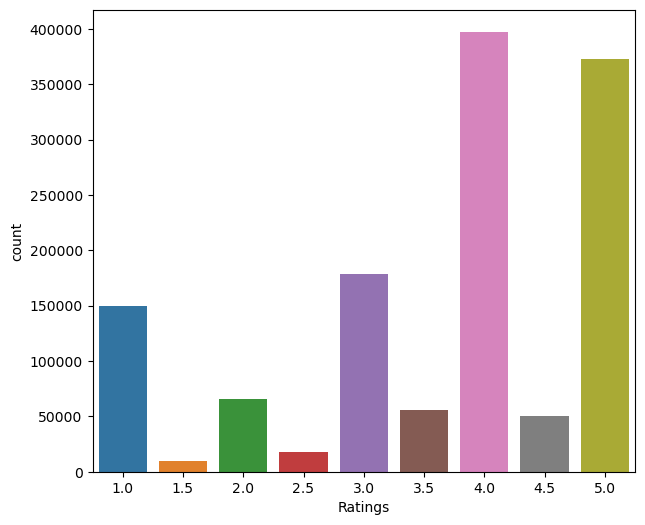

In [134]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

## Sentimental Analysis

Also known as opinion mining, it is a technique to determine whether some piece of text is
positive, neutral or negative

Let us map reviews to negative if the rating given is less than 2.5 and positive if rating is greater than 2.5

In [105]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

In [106]:
# Stopword removal, lemmatization and tokenization

stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guransh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/guransh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/guransh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)

In [108]:
embed_dim = 32
lstm_out = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [109]:
# Encoding by generating dummy variables

Y = pd.get_dummies(rating_df['sent'].astype(int)).values

# Getting the training and test datasets

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(868218, 194) (868218, 2)
(427631, 194) (427631, 2)


In [110]:
batch_size = 3200
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)

Epoch 1/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 175s 638ms/step - accuracy: 0.8576 - loss: 0.3512
Epoch 2/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 162s 595ms/step - accuracy: 0.9398 - loss: 0.1567
Epoch 3/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 174s 638ms/step - accuracy: 0.9486 - loss: 0.1343
Epoch 4/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 155s 567ms/step - accuracy: 0.9544 - loss: 0.1202
Epoch 5/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 167s 613ms/step - accuracy: 0.9595 - loss: 0.1082


In [111]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 194, 32)        │        96,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,160 (1.19 MB)

 Trainable params: 104,386 (407.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208,774 (815.53 KB)

None


## Validating our model

In [112]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

134/134 - 29s - 218ms/step - accuracy: 0.9630 - loss: 0.0998
score: 0.10
acc: 0.96


**We have successfully built a robust and accurate model for Sentimental Analysis**